# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Hee Su Chang 

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

\begin{align}
\int_{0}^{\pi} f(x) dx &= \int_{0}^{\pi} sin(x) dx \\
&= \left.-cos(x)\right\vert_0^\pi \\
&= 1 - (-1) \\
&= 2
\end{align}

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The ratio would estimate the fraction of the box $[0,\pi]\times [0,1]$ that is covered by the area under the curve $f(x)$. Since the area of the box is $\pi$ and the area under the curve within this box is 2, the ratio should come out to be $2/\pi$. This ratio could also represent the proability that a randomly sampled point falls under the curve in this problem since both X and Y are uniformly distributed. 

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

We could multiply the ratio of points estimated from Part B and multiply that by the actual area of the box. This will estimate the value of the desired integral. It's similar to finding the expectance of the estimator.

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

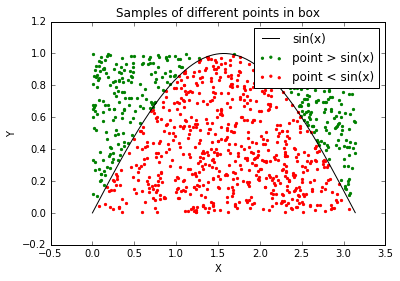

(estimate, sample_var) for 1K samples : (2.0074777056438777, 0.88094437373860901)
(estimate, sample_var) for 100K samples : (2.0011631044101623, 0.90664010989352894)


In [2]:
def integrate(num_samples=int(1e2), isPlot=False):
    # TO DO  
    x = []
    y = []
    underX = []
    underY = []
    underF = 0
    for i in range(num_samples):
        sampleX = np.random.uniform(low=0, high=np.pi)
        sampleY = np.random.uniform(low=0, high=1)
        if sampleY < np.sin(sampleX):
            underF = underF + 1
            underX.append(sampleX)
            underY.append(sampleY)
        else:
            x.append(sampleX)
            y.append(sampleY)    
    estimate = (underF/num_samples)*(1*np.pi)
    sample_var = np.var(y + underY) + np.var(x + underX)
    if isPlot:
      plt.scatter(x, y, color='green', s=5,label="point > sin(x)")
      plt.scatter(underX, underY, color='red', s=5, label="point < sin(x)")
      t = np.arange(0, np.pi, 0.01)
      plt.plot(t,np.sin(t), color='black', linewidth=1.0, label='sin(x)')
      plt.xlabel("X")
      plt.ylabel("Y")
      plt.title("Samples of different points in box")
      plt.legend()
      plt.show()
    return estimate, sample_var 
print("(estimate, sample_var) for 1K samples : " +str(integrate(num_samples=int(1e3), isPlot=True)))
print("(estimate, sample_var) for 100K samples : "+str(integrate(num_samples=int(1e5))))

We can see that the estimate of the area is very close to the exact value of the integral 2 that we calculated in part A.

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

We know from Part B that our estimator estimates the probability of a random point inside the box being under the curve $f(x)$. Therefore, there are two outcomes. Either the random point is under the curve or under. This means that the distribution of the random variable we're actually sampling is a bernoulli distribution. The probability parameter p would be $2/\pi$ as we have found in Part D.

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

In part D, the probability is in regards to the Y value for each point at every possible x value. So to find the expected value of the random variable, we can integrate the chance of the probability p for every point at every X from $[0,\pi]$.

\begin{align}
\int_{0}^{\pi} \frac{2}{\pi} dx &= \left.\frac{2}{\pi}x\right\vert_0^\pi \\
&= 2 - 0 \\
&= 2
\end{align}

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

The variance of a bernoulli function is p(1-p). Therefore, the variance of the random variable would be
$\int_{0}^{\pi} \frac{2}{\pi}\times(1-\frac{2}{\pi}) dx = \left.\frac{2}{\pi}\times(1-\frac{2}{\pi})x\right\vert_0^\pi = 0.23133503779\times \pi - 0.23133503779\times0 = 0.72676045523$ The variance in Part F is slightly lower than Part C. This may be because the simulation is actually creating random points whereas the random variable for F is a fixed probability.

### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



Gladly

**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?

$P(\bar{X}\le90)$

$\bar{X}$~$N(91,\frac{6^2}{30})$

$Z = \frac{X-91}{\frac{6}{\sqrt{30}}}$ = $\frac{X-91}{1.09544511501}$

$P(Z\le \frac{90-91}{1.09544511501}) = P(Z \le -0.91287092917)$

In [3]:
from scipy.stats import norm
print("The probability that a bale of hay is rejected under the current system is: \n"+str(norm.cdf(-0.91287092917)))

The probability that a bale of hay is rejected under the current system is: 
0.180655214264


**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


In [4]:
print("The probability that a bale of hay is rejected when the average Freshy level is 94: "+str(norm.cdf((90-94)/1.09544511501)))
print("The probability that a bale of hay is rejected when the average Freshy level is 93: "+str(norm.cdf((90-93)/1.09544511501)))

The probability that a bale of hay is rejected when the average Freshy level is 94: 0.000130364816427
The probability that a bale of hay is rejected when the average Freshy level is 93: 0.00308494966026


We find that the exact cutoff for $\mu$ is somewhere between 94 and 93. Using $\frac{\Phi(x_2)-\Phi(x_1)}{x_2-x_1} = \frac{0.000130364816427-0.00308494966026}{(90-94)/1.09544511501-(90-93)/1.09544511501} = 0.00323658553$ we can find the slope. We can now find how much greater than (90-94)/1.09544511501 that 90-μ/1.09544511501 needs to be in order to get the exact value of μ. $\Delta x = \frac{0.001-0.000130364816427}{0.00323658553}=0.26868907851$.
 $(90-μ)/1.09544511501 = (90-94)/1.09544511501+0.26868907851$. Solving this equation gives us $μ=93.705665861$

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


In [5]:
print("What 90-91/(6/sqrt(n)) needs to be less than for the probability to be less than 0.001: "+str(norm.ppf(0.001)))

What 90-91/(6/sqrt(n)) needs to be less than for the probability to be less than 0.001: -3.09023230617


Using the ppf function, we can find what our Z has to less than for the probability of being rejected to be less than 0.001.
That value turns out to be -3.09023230617. Our Z is going to be $\frac{90-91}{\frac{6}{\sqrt(n)}}$.
Now all we have to solve is the following.
\begin{align}
\frac{90-91}{\frac{6}{\sqrt(n)}} &\le -3.09023230617 \\
-\sqrt(n) &\le -3.09023230617*6\\
n &\ge (3.09023230617*6)^2\\
n &\ge 343.783285419
\end{align}

Since we can't sample a fraction of a piece of hay, we will have to sample at least 344 to ensure each bale of hay is rejected with probability less than 0.001.

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 


      _________  _|\_
     /         \/6  0|
    *    ___    _____/
     |/|/   |/|/


### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

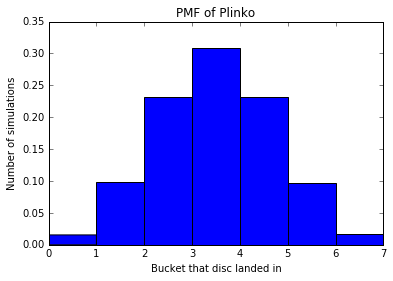

In [6]:
def plinko():
    pos = 3
    for i in range(6):
        go = np.random.choice([-0.5,0.5])
        pos = pos + go
    return int(pos)
results = [plinko() for i in range(10000)]
plt.hist(results, bins=np.linspace(0,7,8), normed=True)
plt.title("PMF of Plinko")
plt.ylabel("Number of simulations")
plt.xlabel("Bucket that disc landed in")
plt.show()

We can see that this estimate of the PMF is symmetrical and unimodal. The 3 bucket has the highest probability. This is exactly what would be expected given our knowledge of how plinko works. 

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

Let the probability of going left when hitting a peg be l = 0.5.
We can find the probability for each bucket using the number of times the disk moves left. Going left every time it hits a peg would result in the disk landing in the 0 bucket. We also need to remember that there are different orders that the disk can go left or right. The bucket that the disk landing does not change with the order that the disk moves a certain way. Therefore, we must use combinations to account for this.
Below is the true PMF for X.

$
PMF(X=0): {{6}\choose{6}}\times l^6 \times (1-l)^0 = 0.015625 \\
PMF(X=1): {{6}\choose{5}}\times l^5 \times (1-l)^1 = 0.09375 \\
PMF(X=2): {{6}\choose{4}}\times l^4 \times (1-l)^2 = 0.234375 \\
PMF(X=3): {{6}\choose{3}}\times l^3 \times (1-l)^3 = 0.3125 \\
PMF(X=4): {{6}\choose{2}}\times l^2 \times (1-l)^4 = 0.234375 \\
PMF(X=5): {{6}\choose{1}}\times l^1 \times (1-l)^5 = 0.09375 \\
PMF(X=6): {{6}\choose{0}}\times l^0 \times (1-l)^6 = 0.015625 \\
$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [7]:
def plinko_b(left_bound=0, right_bound=7):
    pos = 3
    for i in range(6):
        go = 0
        if pos==left_bound:
            go = 0.5
        elif pos==right_bound:
            go = -0.5
        else:
            go = np.random.choice([-0.5,0.5])
        pos = pos + go
    return int(pos)

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




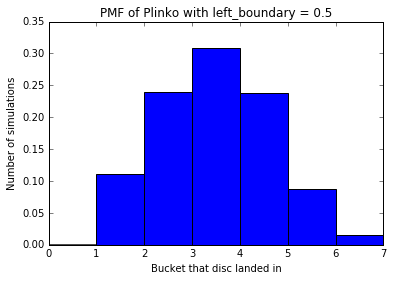

In [8]:
results_b = [plinko_b(left_bound=0.5) for i in range(10000)]
plt.hist(results_b, bins=np.linspace(0,7,8), range=(0,6), normed=True)
plt.title("PMF of Plinko with left_boundary = 0.5")
plt.ylabel("Number of simulations")
plt.xlabel("Bucket that disc landed in")
plt.show()

The most obvious difference between the PMF from Part A and this PMF is that the disk in this one never lands in 0. Pyplot draws a slight line in the bucket for some odd reason, but looking at the actual results (results_b) showed me there are no results that landed in 0. If you look a little closer at this PMF, you will see that the 1 bucket shows a probability of around 0.11. It shows us that the probability of a disk landing in 0 from part A's PMF all went into the probability of a disk landing in 1 for this PMF. This makes sense because when the boundary is set at 0.5, all disks that hit this peg need to go right. However, when this happens, this always goes straight into the 1 bucket. Therefore, all disks that would otherwise have gone to 0 go into 1 when the boundary is present.

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


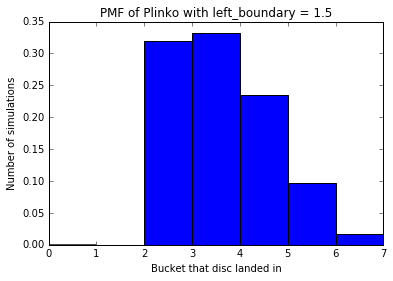

In [9]:
results_b = [plinko_b(left_bound=1.5) for i in range(10000)]
plt.hist(results_b, bins=np.linspace(0,7,8), range=(0,6), normed=True)
plt.title("PMF of Plinko with left_boundary = 1.5")
plt.ylabel("Number of simulations")
plt.xlabel("Bucket that disc landed in")
plt.show()

This PMF for part E is also different. This time no probability exists for the disk landing in buckets 0 and 1. It's observable that the probability of the disk landing in buckets 0 and 1 in the PMF for part A have gone into the probability of the disk landing in buckets 2 and 3 in this PMF. To be specific, the new probability of the disk landing in bucket 3 in this PMF is the sum of the probability of the disk landing in bucket 3 and 0 in the PMF from part A. The new probability of the disk landing in bucket 2 in this PMF is the sum of the probability of the disk landing in bucket 1 from the PMF in part A. This makes sense because if we imagined the left boundary of part E as a mirror, any disk that would have gone into bucket 0 (left every time), would now always go into bucket 3 because the last two left moves would always go right twice. With this, we can find that the probability of the disk that would have gone into bucket 1 in part A would now go into the bucket 2. 

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




Using the mechanism explained in part E, we can add the probability using this mirror-like characteristic of boundaries.
$
PMF(X=0): 0 \\
PMF(X=1): 0 \\
PMF(X=2): 0.234375 + 0.09375 = 0.328125\\
PMF(X=3): 0.3125 + 0.015625 = 0.328125\\
PMF(X=4): 0.234375 \\
PMF(X=5): 0.09375 + 0.015625 = 0.109375\\
PMF(X=6): 0 \\
$

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

We can find the expectation of a game of Plinko using the PMF we wrote down in Part F. The more games we play, the closer the average outcome of the games will converge to the expectation. Therefore, we will want to charge this expectation per disc. 
Below is how we calculate the expectation.
$
\$2\times 0.328125 \\
+
\$3\times 0.328125 \\
+
\$4\times 0.234375 \\
+
\$5\times 0.109375 \\
= \$3.125
$

Therefore, we will want to charge $\$3.125$ per disc.

### Challenge Problem - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
